In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
dataset = pd.read_csv('housing.csv')

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [66]:
dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].mean(),inplace=True)

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
dataset['ocean_proximity'] = dataset['ocean_proximity'].map(mapping)

In [69]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

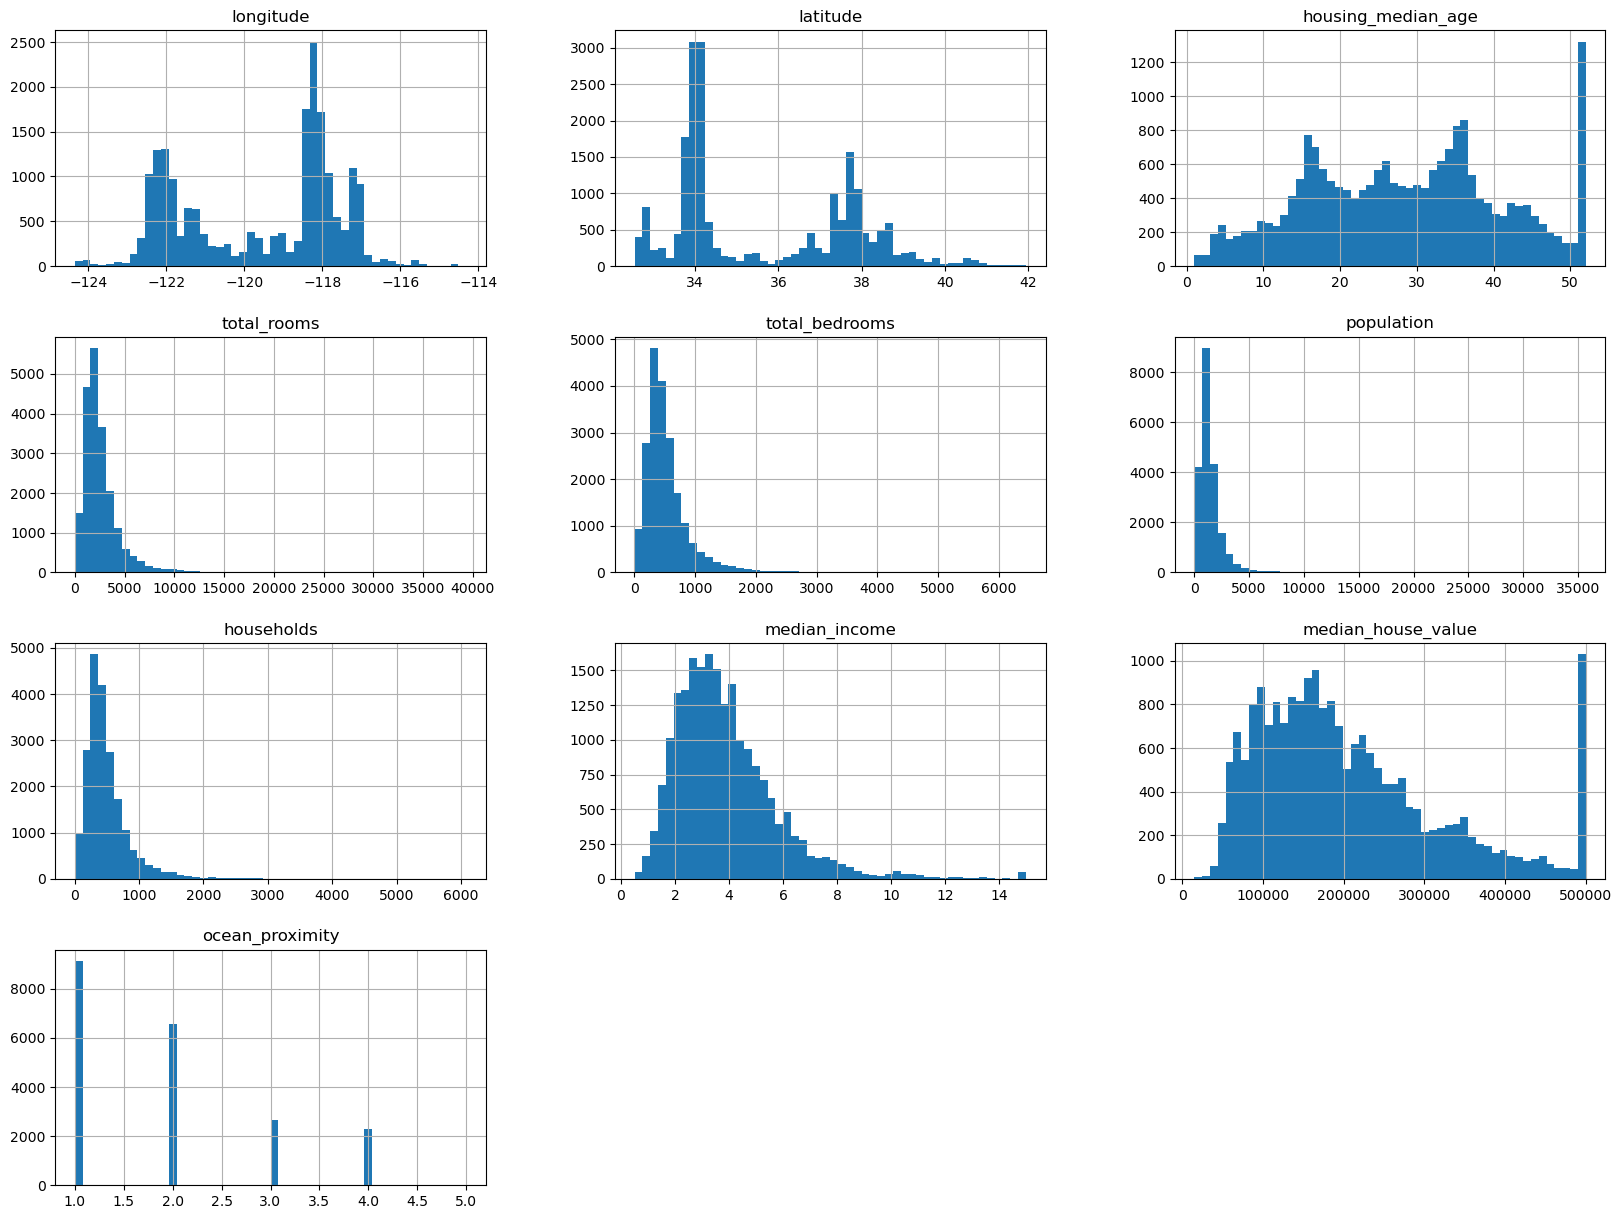

In [71]:
dataset.hist(bins=50, figsize = (20,15))

<Axes: xlabel='latitude', ylabel='longitude'>

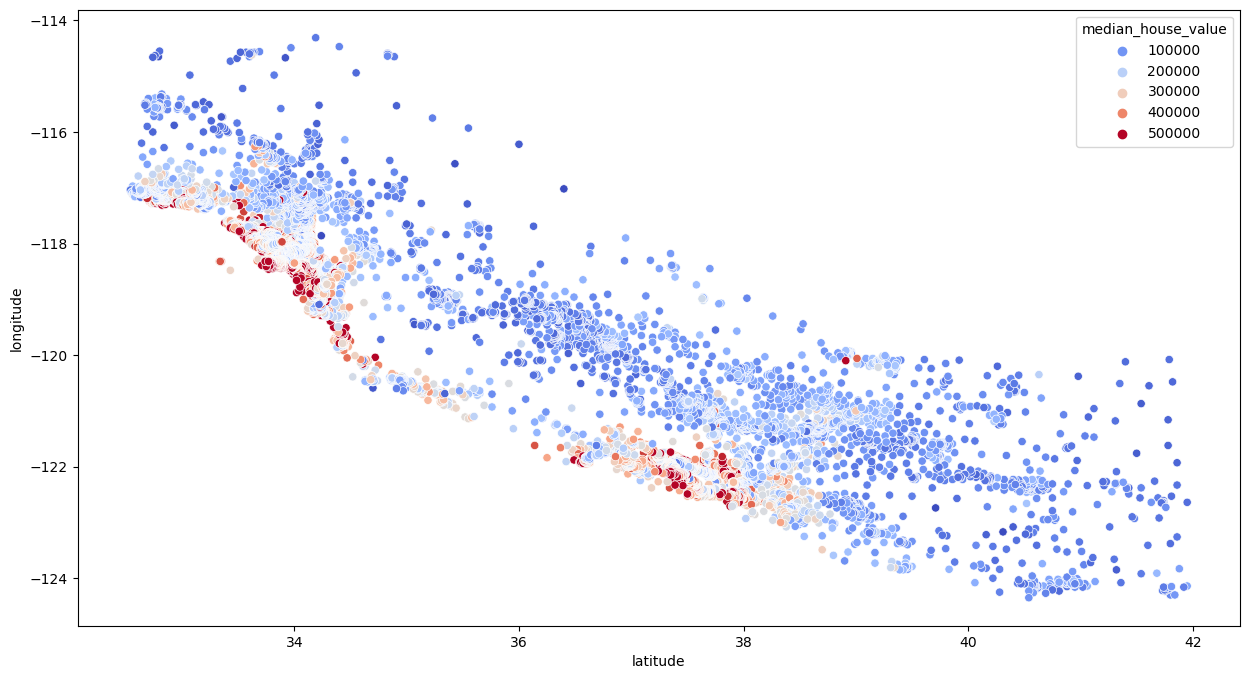

In [72]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude",data=dataset, hue="median_house_value", palette="coolwarm")

In [73]:
X = dataset.drop(['median_house_value'],axis=1)
y = dataset['median_house_value']

In [74]:
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


In [81]:
X = np.array(X)
y = np.array(y)

Train Data is : 
 [    0     1     3 ... 20635 20636 20638]
Test Data is : 
 [    2     5     6 ... 20634 20637 20639]
------------------------------------
X_train Shape is  (15480, 9)
X_Test Shape is  (5160, 9)
y_train Shape is  (15480,)
y_Test Shape is  (5160,)
-------------------------------------------
Training Score:  0.8129776989281045
Testing Score:  0.7197184450750705
RMSE:  61734.88360746209


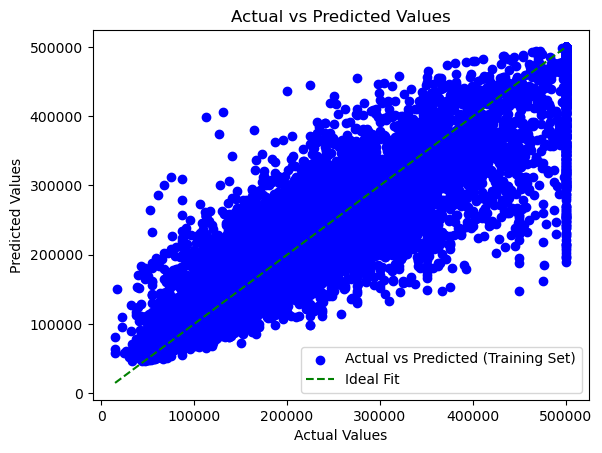

--------------------------------------------


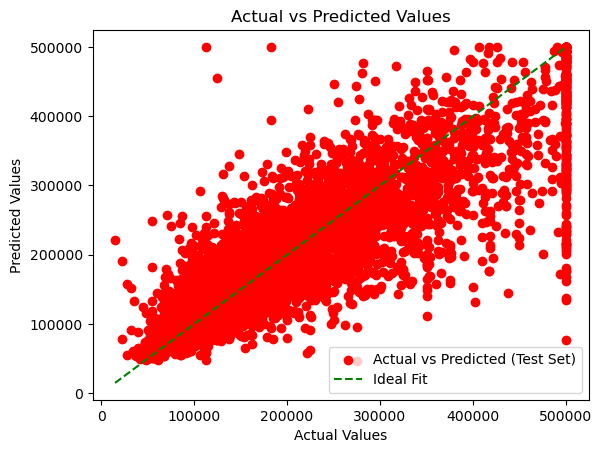

--------------------------------------------
Train Data is : 
 [    0     2     4 ... 20635 20637 20639]
Test Data is : 
 [    1     3     9 ... 20632 20636 20638]
------------------------------------
X_train Shape is  (15480, 9)
X_Test Shape is  (5160, 9)
y_train Shape is  (15480,)
y_Test Shape is  (5160,)
-------------------------------------------
Training Score:  0.8163500931607004
Testing Score:  0.7117682586068044
RMSE:  60997.60279582044


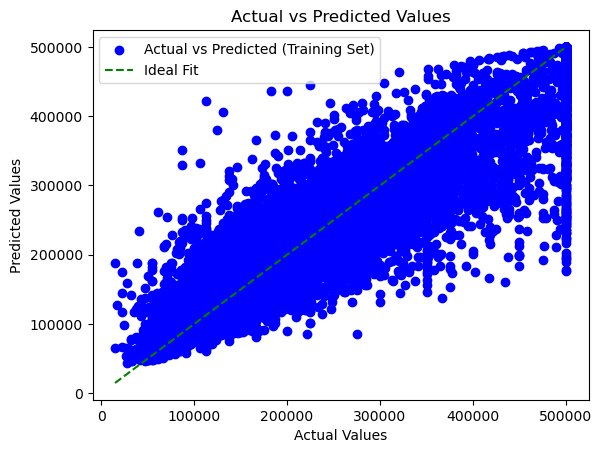

--------------------------------------------


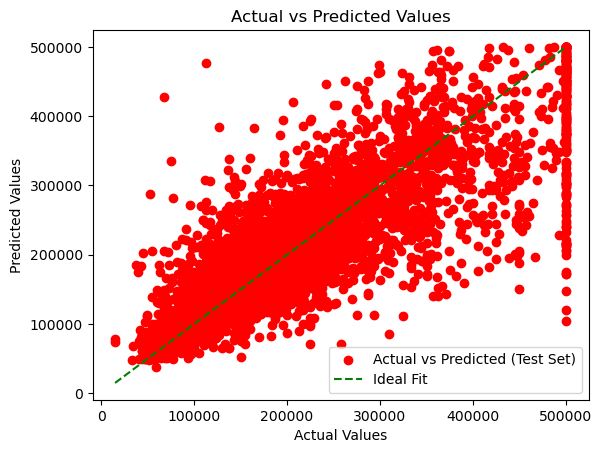

--------------------------------------------
Train Data is : 
 [    1     2     3 ... 20637 20638 20639]
Test Data is : 
 [    0     7     8 ... 20623 20625 20635]
------------------------------------
X_train Shape is  (15480, 9)
X_Test Shape is  (5160, 9)
y_train Shape is  (15480,)
y_Test Shape is  (5160,)
-------------------------------------------
Training Score:  0.814495494947573
Testing Score:  0.7157263239994804
RMSE:  61868.77603148783


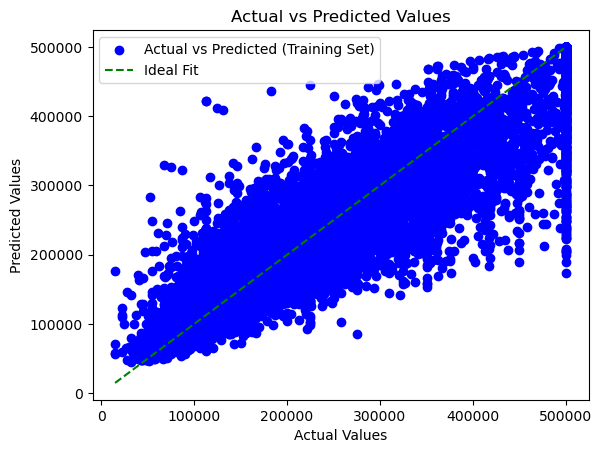

--------------------------------------------


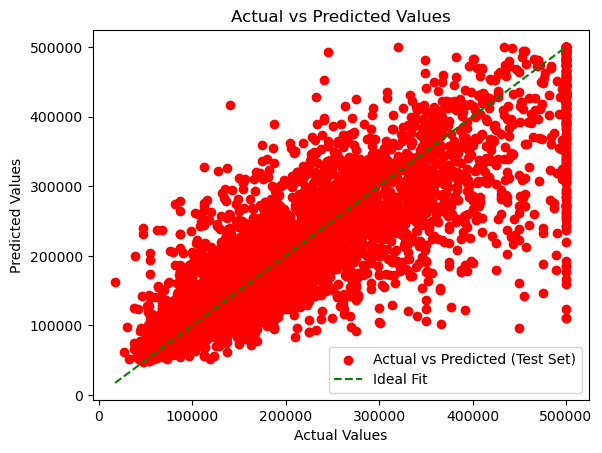

--------------------------------------------
Train Data is : 
 [    0     1     2 ... 20637 20638 20639]
Test Data is : 
 [    4    11    16 ... 20627 20628 20633]
------------------------------------
X_train Shape is  (15480, 9)
X_Test Shape is  (5160, 9)
y_train Shape is  (15480,)
y_Test Shape is  (5160,)
-------------------------------------------
Training Score:  0.8111535342993168
Testing Score:  0.7294582496092294
RMSE:  59906.65213337162


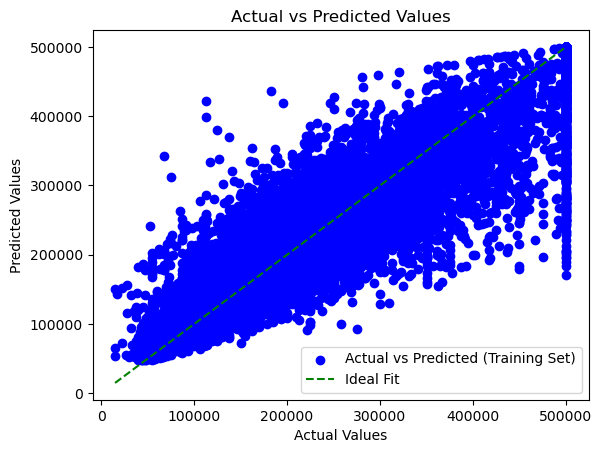

--------------------------------------------


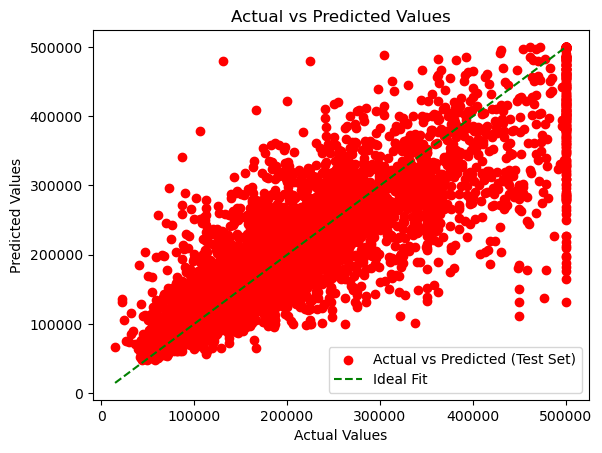

--------------------------------------------


In [101]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=4, random_state = 40, shuffle = True)
kf.get_n_splits(X)

test_scores = []
test_rmse = []

for train_index, test_index in kf.split(X):
    print("Train Data is : \n", train_index)
    print("Test Data is : \n", test_index)
    print("------------------------------------")
    
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    
    print('X_train Shape is ', X_train.shape)
    print('X_Test Shape is ', X_test.shape)
    
    print('y_train Shape is ', y_train.shape)
    print('y_Test Shape is ', y_test.shape)
    
    print('-------------------------------------------')
    
    
    
    from sklearn.preprocessing import StandardScaler
    standrd = StandardScaler()
    X_train = standrd.fit_transform(X_train)
    X_test  = standrd.fit_transform(X_test)

    
    from sklearn.neighbors import KNeighborsRegressor
    regressor = KNeighborsRegressor(n_neighbors = 5,  algorithm = 'ball_tree' , metric = 'minkowski', p = 2)
    regressor.fit(X_train, y_train)
    
    
    
    from sklearn.metrics import mean_squared_error


    y_pred = regressor.predict(X_test)

    rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Training Score: ', regressor.score(X_train, y_train))
    print('Testing Score: ', regressor.score(X_test, y_test))
    print('RMSE: ',rmse)
    
    
    test_scores.append(regressor.score(X_test, y_test))
    test_rmse.append(rmse)
    
    
    plt.scatter(y_train, regressor.predict(X_train), color='blue', label='Actual vs Predicted (Training Set)')
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='green', label='Ideal Fit')

    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    
    print('--------------------------------------------')
    
    plt.scatter(y_test, y_pred, color='red', label='Actual vs Predicted (Test Set)')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', label='Ideal Fit')

    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    
    print('--------------------------------------------')


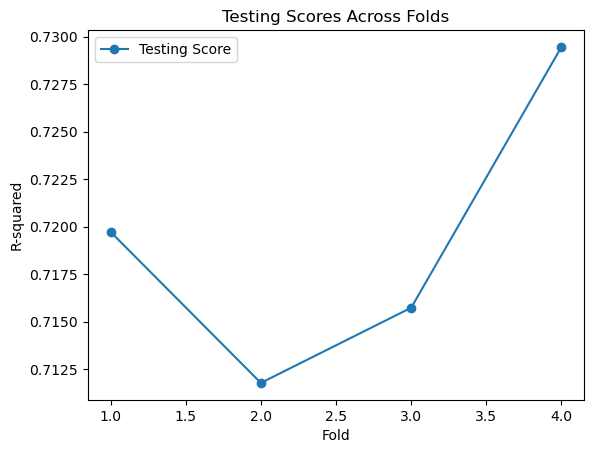

In [99]:

plt.plot(range(1, kf.get_n_splits() + 1), test_scores, marker='o', label='Testing Score')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Testing Scores Across Folds')
plt.legend()
plt.show()

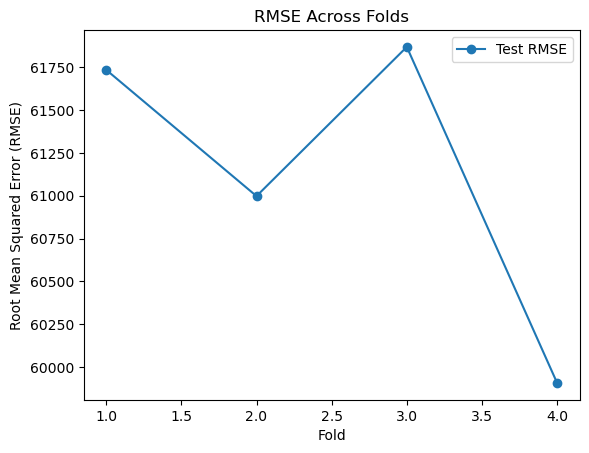

In [102]:
plt.plot(range(1, kf.get_n_splits() + 1), test_rmse, marker='o', label='Test RMSE')
plt.xlabel('Fold')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Across Folds')
plt.legend()
plt.show()